# Geographic Segmentation

## Importing Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

# Data Cleaning

#### Removing Last Row(Grand Total) from each dataset

In [6]:
file_paths = {
    "CS_Expressway": "CS_Expressway.csv",
    "CS_Highway": "CS_Highway.csv",
    "CS_perState": "CS_perState.csv",
    "CS_Sanctioned": "CS_Sanctioned.csv",
}

cleaned_dfs = {}
for name, path in file_paths.items():
    df = pd.read_csv(path)  
    cleaned_dfs[name] = df.iloc[:-1]  

{key: df.head() for key, df in cleaned_dfs.items()}

{'CS_Expressway':             Expressways  EV Charging Stations Sanctioned
 0         Mumbai - Pune                               10
 1  Ahmadabad - Vadodara                               10
 2     Delhi Agra Yamuna                               20
 3      Bengaluru Mysore                               14
 4     Bangaluru-Chennai                               30,
 'CS_Highway':                   Highways  EV Charging Stations Sanctioned
 0         Delhi - Srinagar                               80
 1          Delhi – Kolkata                              160
 2            Agra - Nagpur                               80
 3  Meerut to Gangotri Dham                               44
 4           Mumbai - Delhi                              124,
 'CS_perState':             State/UT  No of RO's where EV Charging Facility available\n\n
 0     Andhra Pradesh                                                 65  
 1  Arunachal Pradesh                                                  4  
 2           

## Highways

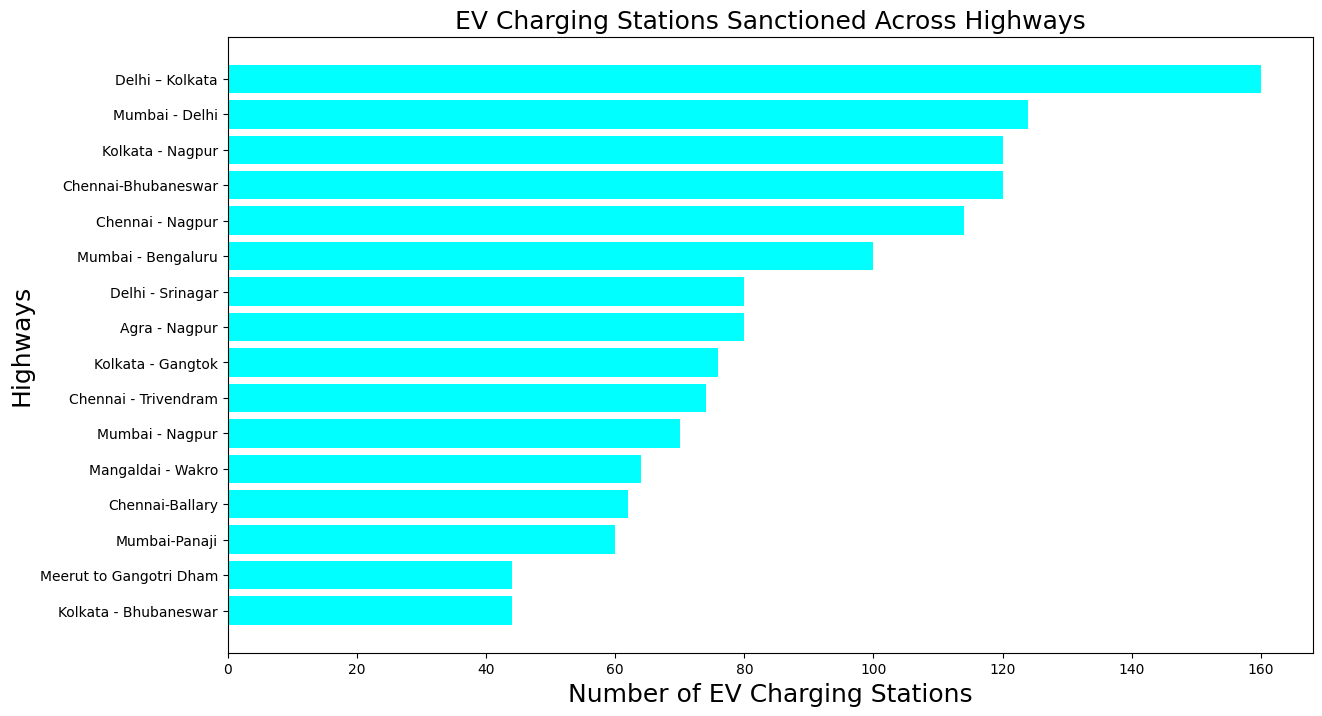

In [7]:
cs_highway = cleaned_dfs["CS_Highway"].copy()
def plot_frequency(data, feature1, feature2, x_lbl, y_lbl, text, color):
    new_df = data.sort_values(by=[feature2], ascending=False)   
    plt.figure(figsize=(14, 8))
    x_state = list(new_df[feature1].values)    
    y_state = list(new_df[feature2].values)   
    plt.barh(x_state, y_state, color=color)
    plt.xlabel(x_lbl, fontsize=18)   
    plt.ylabel(y_lbl, fontsize=18)   
    plt.title(text, fontsize=18)   
    plt.gca().invert_yaxis()   
    plt.show()

plot_frequency(
    data=cs_highway,
    feature1="Highways",
    feature2="EV Charging Stations Sanctioned",
    x_lbl="Number of EV Charging Stations",
    y_lbl="Highways",
    text="EV Charging Stations Sanctioned Across Highways",
    color="cyan"
)

## Expressways

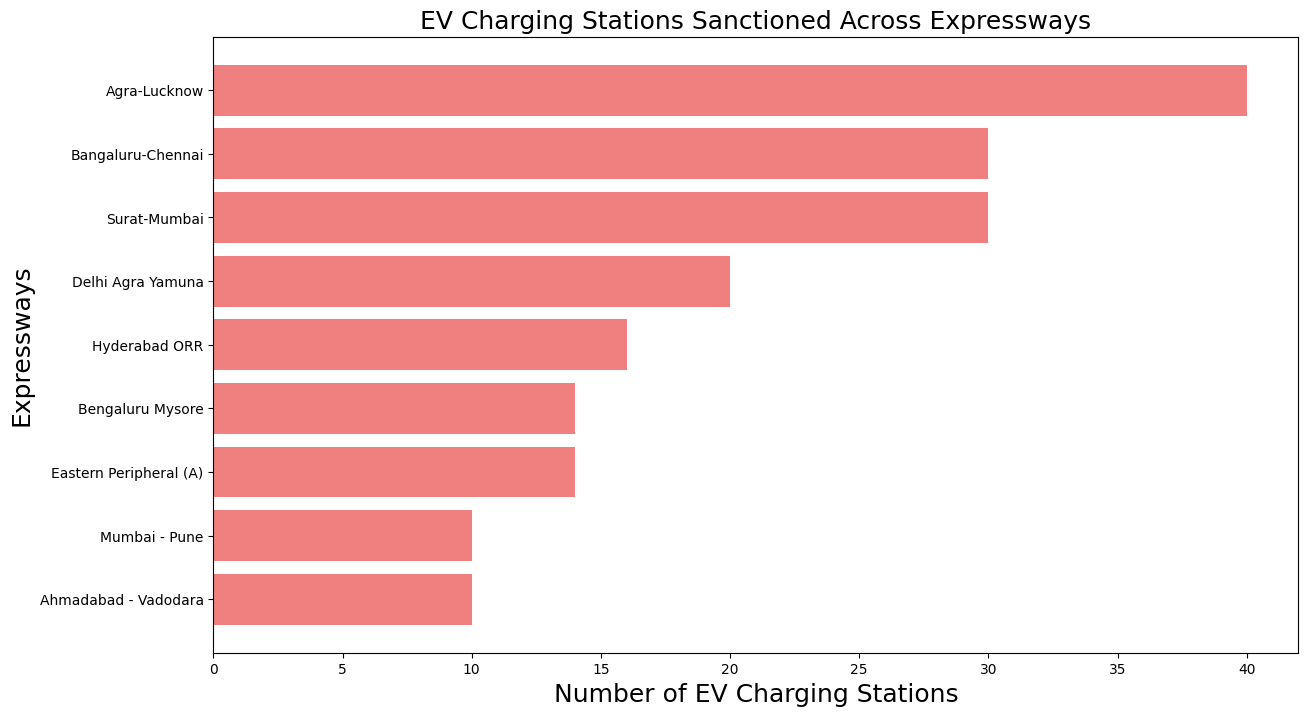

In [8]:
cs_expressway = cleaned_dfs["CS_Expressway"].copy()

def plot_frequency(data, feature1, feature2, x_lbl, y_lbl, text, color):
    new_df = data.sort_values(by=[feature2], ascending=False)   
    plt.figure(figsize=(14, 8))
    x_state = list(new_df[feature1].values)    
    y_state = list(new_df[feature2].values)   
    plt.barh(x_state, y_state, color=color)
    plt.xlabel(x_lbl, fontsize=18)   
    plt.ylabel(y_lbl, fontsize=18)   
    plt.title(text, fontsize=18)   
    plt.gca().invert_yaxis()   
    plt.show()
    
plot_frequency(
    data=cs_expressway,
    feature1="Expressways",
    feature2="EV Charging Stations Sanctioned",
    x_lbl="Number of EV Charging Stations",
    y_lbl="Expressways",
    text="EV Charging Stations Sanctioned Across Expressways",
    color="lightcoral"
)

### Available EV Charging Stations

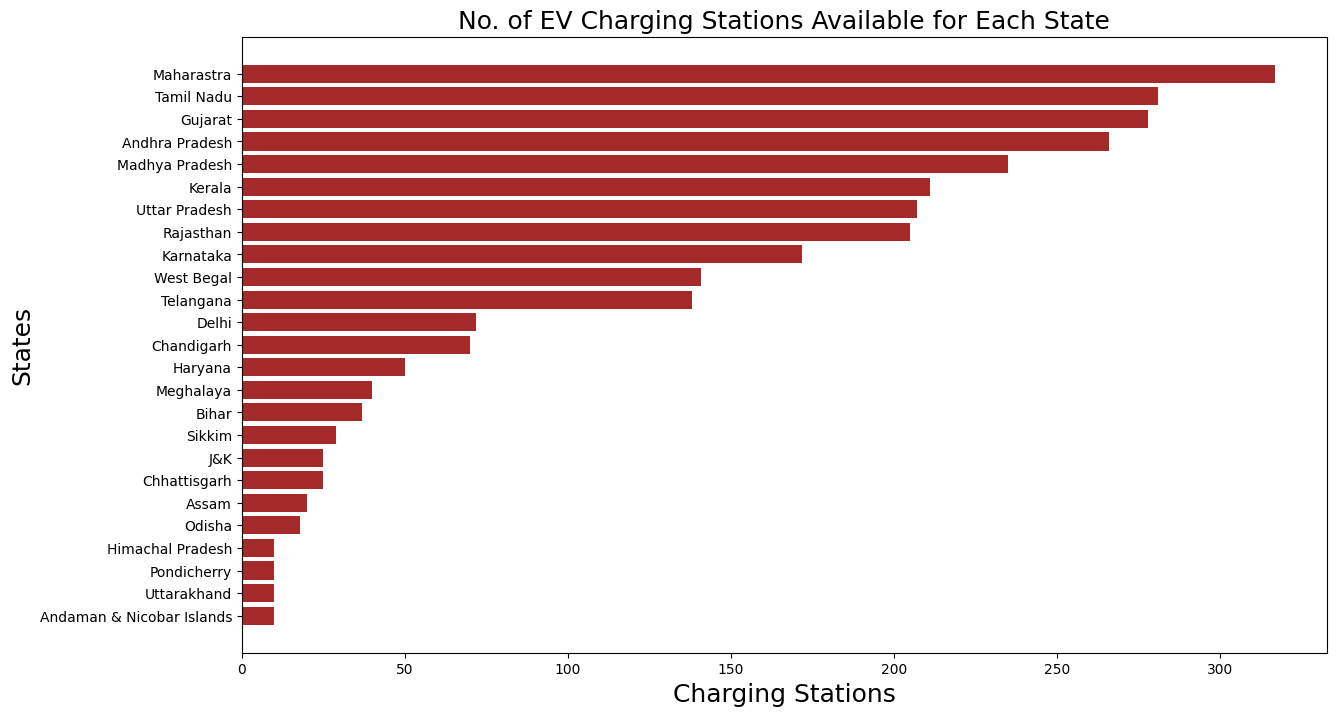

In [9]:
cs_sanctioned = cleaned_dfs["CS_Sanctioned"].copy()
cs_sanctioned.columns = cs_sanctioned.columns.str.strip()
cs_sanctioned.rename(columns={"No of RO's where EV Charging Facility available": "No. of EV Charging Sanctioned"}, inplace=True)

def plot_frequency(data, feature1, feature2, x_lbl, y_lbl, text, color):
    new_df = data.sort_values(by=[feature2], ascending=False)   
    plt.figure(figsize=(14, 8))
    x_state = list(new_df[feature1].values)   
    y_state = list(new_df[feature2].values)   
    plt.barh(x_state, y_state, color=color)
    plt.xlabel(x_lbl, fontsize=18)   
    plt.ylabel(y_lbl, fontsize=18)   
    plt.title(text, fontsize=18)   
    plt.gca().invert_yaxis()   
    plt.show()

plot_frequency(cs_sanctioned, 'State/UT', 'No. of EV Charging Sanctioned', 'Charging Stations', 'States', 'No. of EV Charging Stations Available for Each State', 'brown')

# Data Visualization on Map

In [10]:
map_df = gpd.read_file("india_st.shx")
map_df['STATE'] = map_df['STATE'].str.title()
map_df['STATE'] = map_df['STATE'].replace({
    "Andaman And Nicobar Islands": "Andaman & Nicobar Islands",
    "Jammu And Kashmir": "J&K"
})

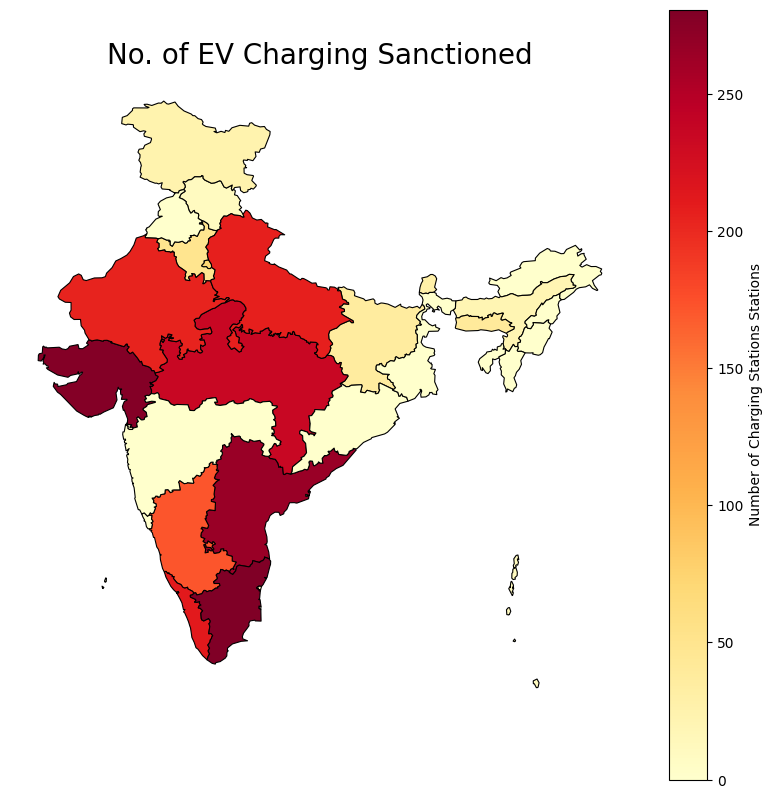

In [11]:
merged_new = map_df.set_index('STATE').join(cs_sanctioned.set_index('State/UT'))
merged_new['No. of EV Charging Sanctioned'] = merged_new['No. of EV Charging Sanctioned'].replace(np.nan, 0)
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('No. of EV Charging Sanctioned', fontdict={'fontsize': 20, 'fontweight': 10})

merged_new.plot(
    column='No. of EV Charging Sanctioned',
    cmap='YlOrRd',
    linewidth=0.8,
    ax=ax,
    edgecolor='0',
    legend=True,
    legend_kwds={'label': "Number of Charging Stations Stations"}
)

plt.show()